In [3]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import EDM as efn


# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Perform lagged embedding on lorenz

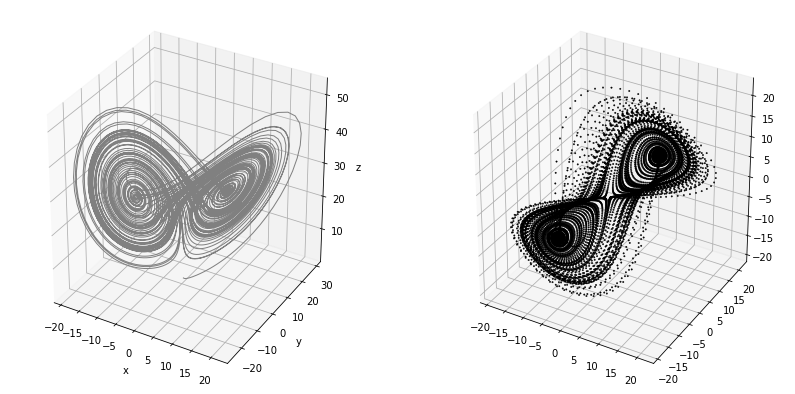

In [4]:
from mpl_toolkits.mplot3d import Axes3D

dt = 0.01
steps = 10000
sigma = 10
r = 28
b = 2.667
xs = np.empty(steps + 1)
ys = np.empty(steps + 1)
zs = np.empty(steps + 1)

# Set starting values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Calculate the partial derivatives at each t, then estimate t+1
for i in range(steps):
    x_d, y_d, z_d = efn.Lorenz(xs[i], ys[i], zs[i], sigma, r, b)
    xs[i + 1] = xs[i] + (x_d * dt)
    ys[i + 1] = ys[i] + (y_d * dt)
    zs[i + 1] = zs[i] + (z_d * dt)
    
    
# perform LCE on lorenz
data_embed = efn.takens_embed(3, 10, xs)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=1, c = 'grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax = fig.add_subplot(1, 2, 2, projection='3d')
data = data_embed
dotplot = ax.scatter3D(data[:,0], data[:,1],data[:,2], alpha = 1, linewidth = 0.4, color = 'k', s = 2)
plt.show()

# Estimate embedding dimension and tau

In [5]:
bln = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN*cutrealtrace*.npy')
p5 = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ05*cutrealtrace*.npy')
p20 = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20*cutrealtrace*.npy')
bln, p5, p20

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6

In [23]:
#find first PC of data for embedding
def PC1(input_data, n_components):
    from sklearn import decomposition

    pca = decomposition.PCA(n_components)
    fit = pca.fit(input_data)
    output_data = fit.components_[0]
    return(output_data)

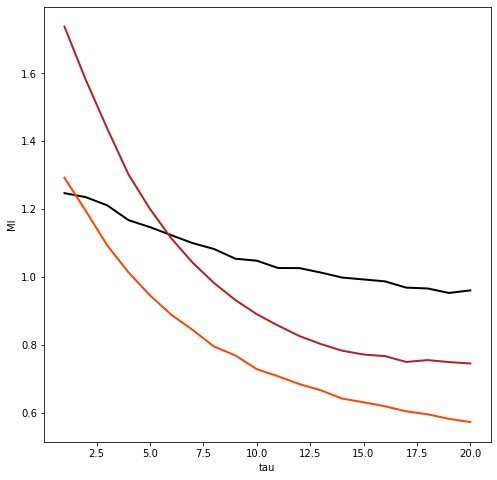

In [61]:
#Visualise MI - this should be the first minima
data_list = [bln[0], p5[0], p20[0]]
col_list = ['k', 'orangered', 'firebrick']
fig, ax = plt.subplots(figsize = (8,8))

for x,data in enumerate(data_list):
    timeseries = PC1(np.load(data), 4)
    MI_list = []
    for i in range(1,21):
        MI_list = np.append(MI_list,[efn.MI(timeseries,i,50)])
    plt.plot(range(1,21),MI_list, col_list[x], linewidth = 2)
    
plt.xlabel('tau');
plt.ylabel('MI');
plt.show()

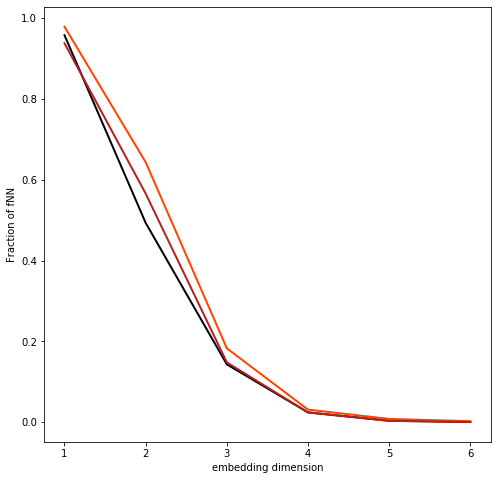

In [6]:
#Visualise false nearest neighbours
tau = 1
data_list = [bln[0], p5[0], p20[0]]
col_list = ['k', 'orangered', 'firebrick']
fig, ax = plt.subplots(figsize = (8,8))

for x,data in enumerate(data_list):
    timeseries = PC1(np.load(data), 4)
    
    nFNN = []
    for i in range(1,7):
        nFNN.append(efn.FNN(timeseries,tau,i, 10) / len(timeseries))
    plt.plot(range(1,7),nFNN,  col_list[x], linewidth = 2)

plt.xlabel('embedding dimension');
plt.ylabel('Fraction of fNN');
plt.show()

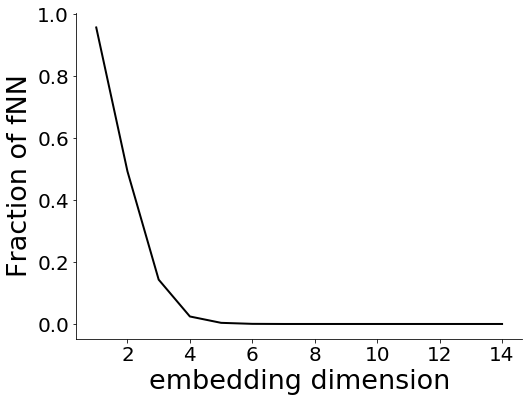

In [17]:
#Visualise false nearest neighbours
tau = 1
data_list = [bln[0]]
col_list = ['k', 'orangered', 'firebrick']
fig, ax = plt.subplots(figsize = (8,6))

for x,data in enumerate(data_list):
    timeseries = PC1(np.load(data), 4)
    
    nFNN = []
    for i in range(1,15):
        nFNN.append(efn.FNN(timeseries,tau,i, 10) / len(timeseries))
    plt.plot(range(1,15),nFNN,  col_list[x], linewidth = 2)

plt.xticks(size = 20)
plt.yticks(size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('embedding dimension', size = '27');
plt.ylabel('Fraction of fNN', size = '27');
plt.savefig(Ffig + 'FNN.svg', transparent=True)
plt.show()

# Embed data

In [6]:
def nonlinembed(data):
    from sklearn.manifold import Isomap

    embedding = Isomap(n_components=3)
    X_transformed = embedding.fit_transform(data)
    return(X_transformed)

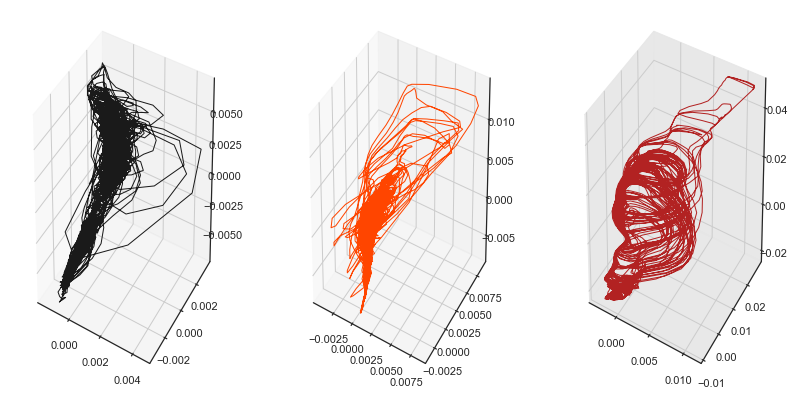

In [512]:
from mpl_toolkits.mplot3d import Axes3D
col_list = ['k', 'orangered','firebrick']
#Visualise one dataset in 3d
choose = 5
data_list = [bln[choose], p5[choose], p20[choose]]
fig = plt.figure(figsize=(14,7))

for i in range(len(data_list)):
    data = PC1(np.load(data_list[i]), 4)

    tau = 1 
    #tau = efn.find_tau(data) 
    m = efn.find_E_FNN(data, 10)
    
    embed = efn.takens_embed(m, tau, data) #embed data
    manifold = nonlinembed(embed) #do isomap for visualisation
    
    filt_data = gaussian_filter(manifold, 0.9)
    
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    dotplot = ax.plot(filt_data[:,2], filt_data[:,1],filt_data[:,0], alpha = 1, linewidth = 1, c = col_list[i])

ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


In [22]:
data_list

[['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

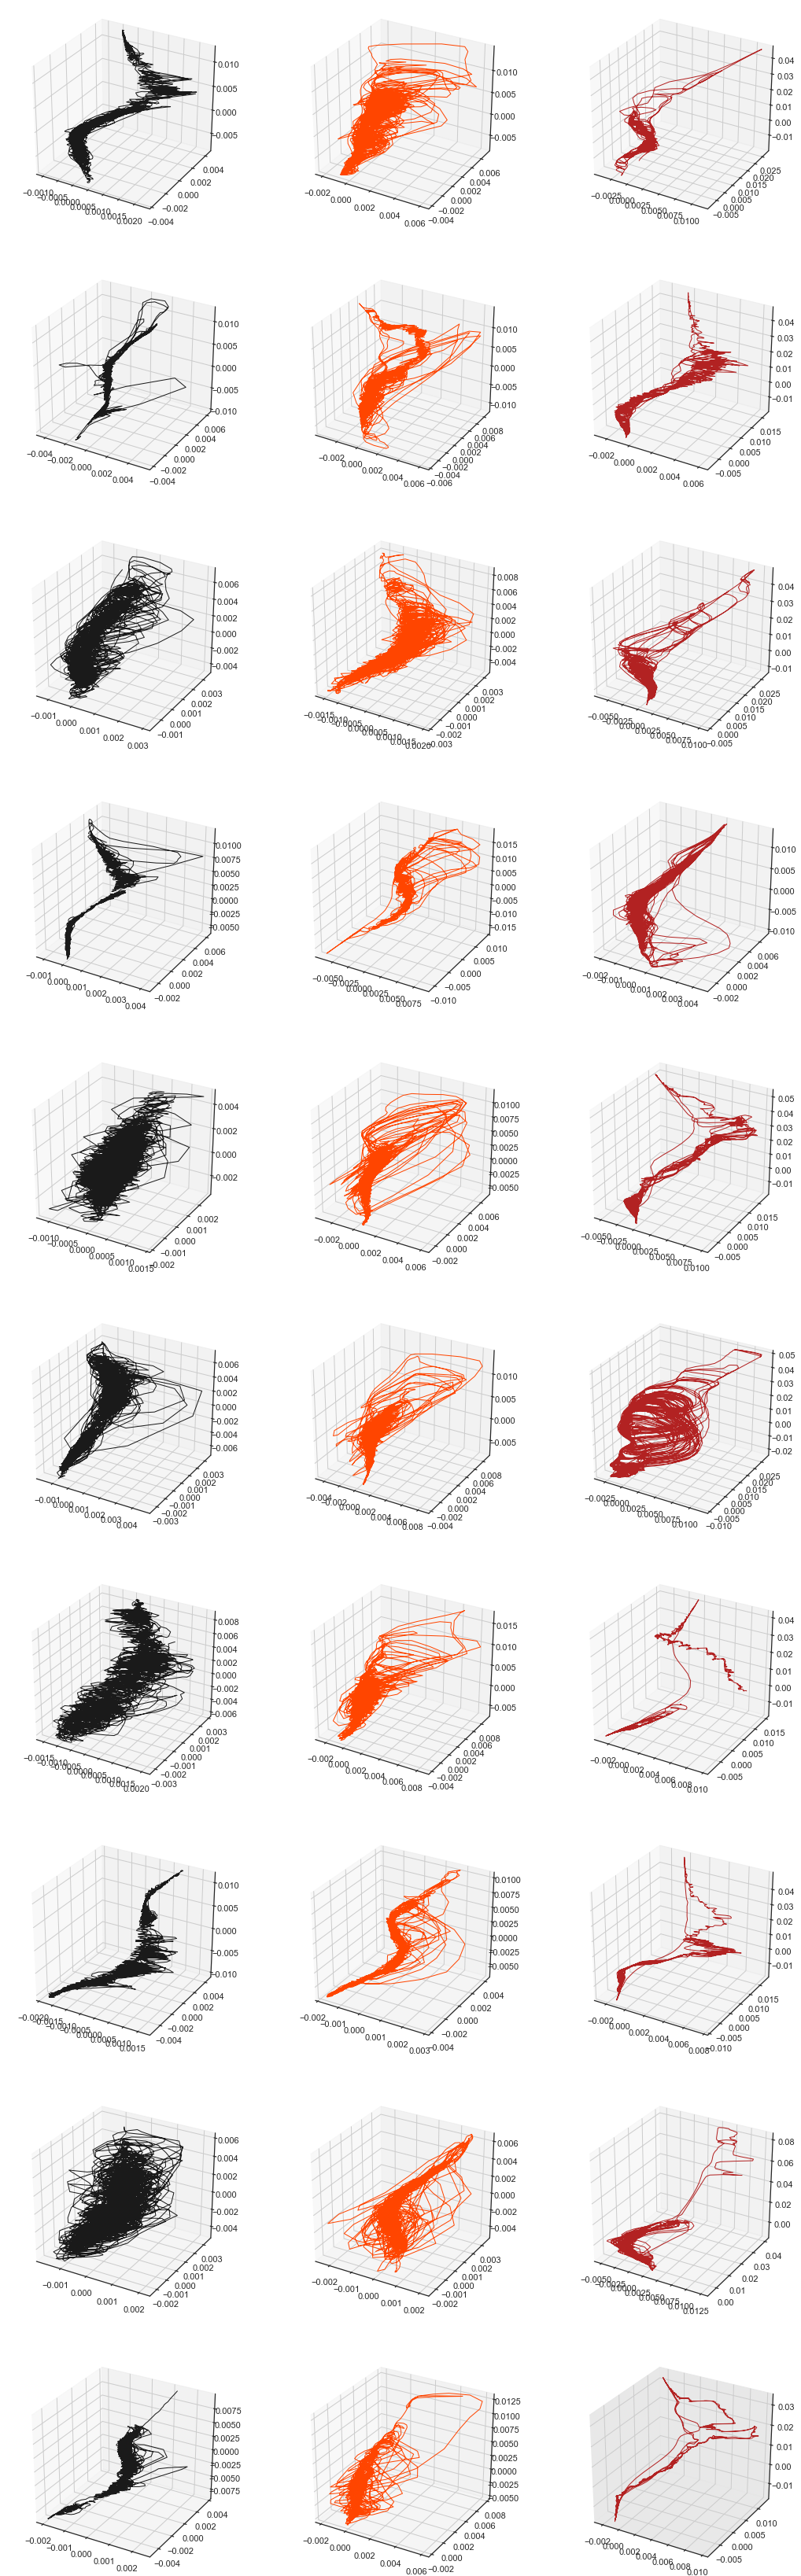

In [533]:
from mpl_toolkits.mplot3d import Axes3D
col_list = ['k', 'orangered', 'firebrick']

data_list = [bln, p5, p20]
fig = plt.figure(figsize=(18,60))
count=0

for i in range(len(data_list[0])):
    for e in range(len(data_list)):
        data = PC1(np.load(data_list[i]), 4)

        tau = 1 
        #tau = efn.find_tau(data) 
        m = efn.find_E_FNN(data, 10)

        embed = efn.takens_embed(m, tau, data) #embed data
        manifold = nonlinembed(embed) #do isomap for visualisation
        filt_data = gaussian_filter(manifold, 0.9)

        ax = fig.add_subplot(10, 3, count+1, projection='3d')
        dotplot = ax.plot(filt_data[:,2], filt_data[:,1],filt_data[:,0], alpha = 1, linewidth = 1, c = col_list[e])
        count+=1

ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


# Calculate lyapunov exponent

In [29]:
binlist = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN*_cut*realtrace.*')[:10]
coordlist = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN**realcoord*')[:10]
binlist, coordlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
  'PTZ-WILDTYPE-07_2photon_sess

In [28]:
data_list = binlist
for i in range(len(data_list)):
    name = binlist[i][:binlist[i].find('run')+7]
    print(name)

PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_
PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_


In [27]:
le

array([0.32058223, 0.28083756, 0.24941557, ..., 0.        , 0.        ,
       0.        ])

In [30]:
data_list = binlist
for i in range(len(data_list)):
    name = binlist[i][:binlist[i].find('run')+7]
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])

    time_series = PC1(trace, 4)

    tau = 1
    E = efn.find_E(time_series, tau, 'fnn')

    embed = efn.takens_embed(E,tau,time_series)
    le = efn.LE_embed(embed, tau)
    np.save(Fdata + experiment  + name + 'LE_tau1.npy', le)
    print(str(i) + 'of ' + str(len(binlist)))

0of 10
1of 10
2of 10
3of 10
4of 10
5of 10
6of 10
7of 10
8of 10
9of 10


In [31]:
binlist = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20*_cut*realtrace.*')[:10]
coordlist = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20**realcoord*')[:10]
binlist, coordlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
  '

In [32]:
data_list = binlist
for i in range(len(data_list)):
    name = binlist[i][:binlist[i].find('run')+7]
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])

    time_series = PC1(trace, 4)

    tau = 1
    E = efn.find_E(time_series, tau, 'fnn')

    embed = efn.takens_embed(E,tau,time_series)
    le = efn.LE_embed(embed, tau)
    np.save(Fdata + experiment  + name + 'LE_tau1.npy', le)
    print(str(i) + 'of ' + str(len(binlist)))

0of 10
1of 10
2of 10
3of 10
4of 10
5of 10
6of 10
7of 10
8of 10
9of 10


In [7]:
bln_le = adfn.return_files(Fdata, 'PTZ-WILDTYPE', 'LE-emp*bln.*')
p20_le = adfn.return_files(Fdata, 'PTZ-WILDTYPE', 'LE-emp*p20.*')
bln_le, p20_le

(['LE-emp_bln.npy'], ['LE-emp_p20.npy'])

In [406]:
def conv(data):
    new_data = np.zeros((len(data), 4899))
    for i in range(len(data)):
        new_data[i] = data[i][:4899]
    return(new_data)

def le_plot(data, stop, col):
    yaxis = np.mean(conv(data), axis=0)[:stop]
    xaxis = np.arange(0, len(yaxis))

    sem = stats.sem(conv(data))[:stop]
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=col,alpha=0.6)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = '8', markersize = 1, alpha = 1, color = col)

#Find average le
bln_mean = np.mean(conv(np.load(bln_le[0], allow_pickle=True)), axis=0)
sz_mean = np.mean(conv(np.load(p20_le[0], allow_pickle=True)), axis=0)

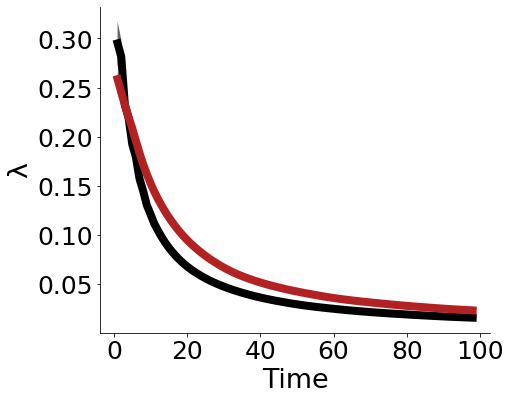

In [407]:
from scipy import stats
fig, axarr = plt.subplots(figsize = (7,6))  

stop = 100
le_plot(np.load(bln_le[0], allow_pickle=True), stop, 'k')
le_plot(np.load(p20_le[0], allow_pickle=True), stop, 'firebrick')

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('λ', size = '27')
axarr.set_xlabel('Time', size = '27')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 25)
plt.xticks(size = 25, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
plt.show()

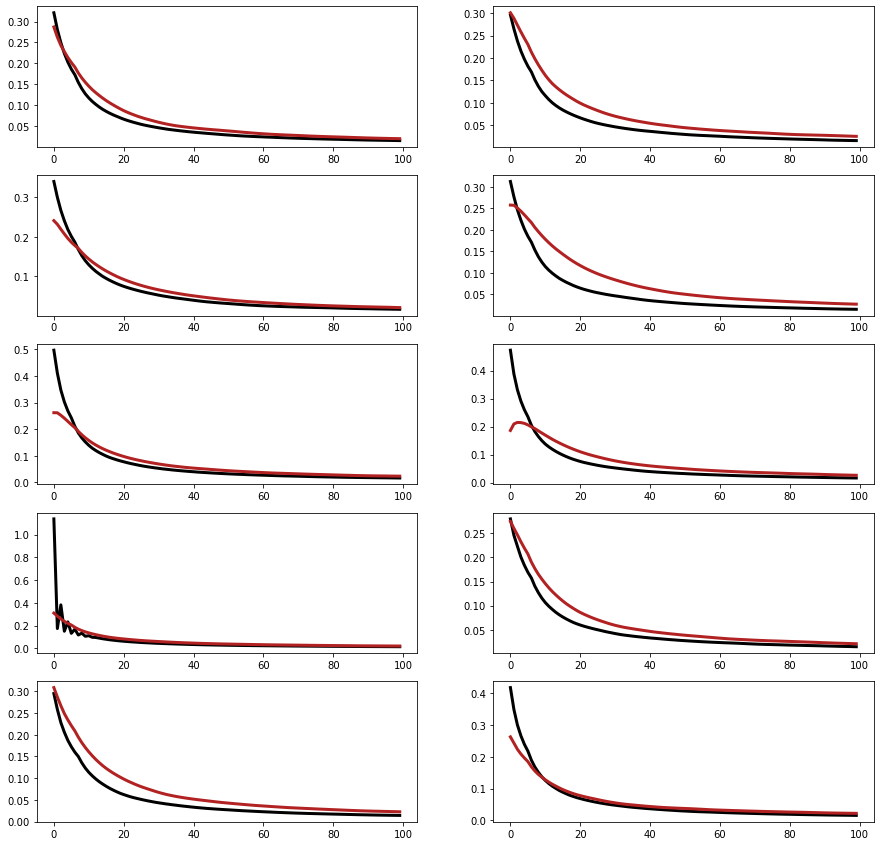

In [424]:
plt.figure(figsize = (15,15))

for i in range(len(np.load(bln_le[0], allow_pickle=True))):
    plt.subplot(5, 2, i + 1)
    plot = plt.plot(np.load(bln_le[0], allow_pickle=True)[i][:100], color = 'k', linewidth = 3)
    plot = plt.plot(np.load(p20_le[0], allow_pickle=True)[i][:100], color = 'firebrick', linewidth = 3)
plt.show()

In [449]:
input_data = adfn.comb_list([np.load(bln_le[0], allow_pickle=True), np.load(sz_le[0], allow_pickle=True)])
mean_data = list(range(len(input_data)))
for i in range(len(input_data)):
    mean_data[i] = np.mean(input_data[i])
    
cond = ['BLN', 'PTZ20']
cond_data = adfn.cond_list([np.load(bln_le[0], allow_pickle=True), np.load(sz_le[0], allow_pickle=True)], cond, 'dataset')
num = np.arange(0,len(np.load(bln_le[0], allow_pickle=True)))
num_data = adfn.cond_list([np.load(bln_le[0], allow_pickle=True), np.load(sz_le[0], allow_pickle=True)], num, 'datapoint')

le_df = pd.DataFrame({"LE":mean_data , "condition": cond_data, "subject":num_data})
le_df

,LE,condition,subject
0,0.002524,BLN,0
1,0.002416,BLN,1
2,0.002524,BLN,2
3,0.002162,BLN,3
4,0.002625,BLN,4
5,0.002585,BLN,5
6,0.002396,BLN,6
7,0.002190,BLN,7
8,0.002132,BLN,8
9,0.002352,BLN,9


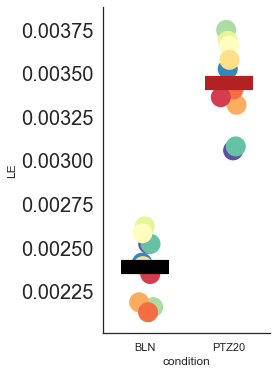

In [464]:
mean_colours = ['black', 'firebrick']
colours  = cm.Spectral_r(np.linspace(0,1,11))
adfn.bar_scatter_plot(le_df, 'LE', (3,6), 7, 20,  mean_colours, colours)

In [485]:
data = le_df[le_df['condition'] == 'BLN']['LE']
adfn.mean_std('BLN', data)

data = le_df[le_df['condition'] == 'PTZ20']['LE']
adfn.mean_std('PTZ20', data)

BLN mean = 0.002390632195184743  , std = 5.6784908186615596e-05
PTZ20 mean = 0.00344500092937194  , std = 7.650478353814993e-05


In [496]:
data1 = le_df[le_df['condition'] == 'BLN']['LE']
data2 = le_df[le_df['condition'] == 'PTZ20']['LE']
data1, data2

(0    0.002524
 1    0.002416
 2    0.002524
 3    0.002162
 4    0.002625
 5    0.002585
 6    0.002396
 7    0.002190
 8    0.002132
 9    0.002352
 Name: LE, dtype: float64,
 10    0.003061
 11    0.003527
 12    0.003083
 13    0.003751
 14    0.003689
 15    0.003662
 16    0.003580
 17    0.003322
 18    0.003410
 19    0.003365
 Name: LE, dtype: float64)

In [498]:
adfn.stats_2samp(data1, data2, 0.05, 1, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.001953125
